In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv('data/faers_adalimumab_2020-2024_ungrouped_cleaned_2.csv', low_memory=False)

In [3]:
data = df.copy()

In [4]:
pd.set_option('display.max_columns', None)
data.head(3)

,primaryid,caseid,caseversion,init_fda_dt,fda_dt,age,age_grp,sex,occp_cod,seq,role_cod,drugname,prod_ai,route,dose_vbm,dose_amt,dose_unit,dose_form,dose_freq,indi_pt,outc_cod,pt,rept_yr,SOC
0,100735935,10073593,5,2014-04-11,2020-03-26,55.0,a,f,cn,1,ps,humira,adalimumab,subcutaneous,unknown,40.0,mg,solution for injection in pre-filled syringe,qow,rheumatoid arthritis,ot,arterial occlusive disease,2020,Vascular disorders
1,100735935,10073593,5,2014-04-11,2020-03-26,55.0,a,f,cn,1,ps,humira,adalimumab,subcutaneous,unknown,40.0,mg,solution for injection in pre-filled syringe,qow,rheumatoid arthritis,ot,carotid artery occlusion,2020,Vascular disorders
2,100735935,10073593,5,2014-04-11,2020-03-26,55.0,a,f,cn,1,ps,humira,adalimumab,subcutaneous,unknown,40.0,mg,solution for injection in pre-filled syringe,qow,rheumatoid arthritis,ot,cataract,2020,Eye disorders


### 1. Reports

In [5]:
# Number of reports
print(f'Number of reports: {data['primaryid'].nunique()}')

Number of reports: 213371


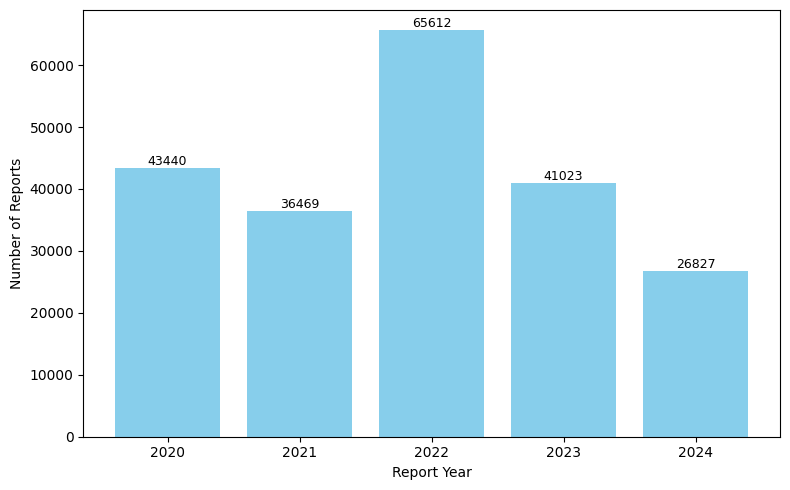

In [ ]:
# Distribution of reports by year
reports_by_year = data[['primaryid', 'rept_yr']].drop_duplicates()
report_counts = reports_by_year['rept_yr'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(report_counts.index, report_counts.values, color='blue')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', 
             ha='center', va='bottom', fontsize=9)

plt.xlabel('Report Year')
plt.ylabel('Number of Reports')
plt.xticks(report_counts.index)  
plt.tight_layout()
plt.show()

### 2. Age

<Figure size 1200x600 with 0 Axes>

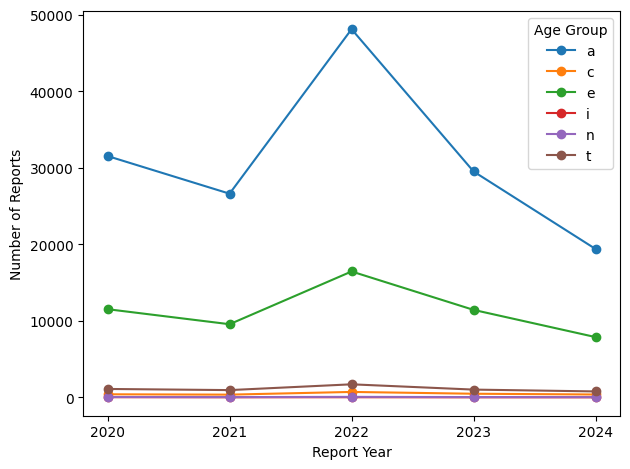

In [16]:
# Group and pivot
age_grp_yrs = data[['primaryid', 'rept_yr', 'age_grp']].drop_duplicates()
age_groups = age_grp_yrs.groupby(['rept_yr', 'age_grp']).size().reset_index(name='count')
pivot_age = age_groups.pivot(index='rept_yr', columns='age_grp', values='count').fillna(0)

# Plot
plt.figure(figsize=(12, 6))
ax = pivot_age.plot(kind='line', marker='o')

# Set integer x-axis ticks
ax.set_xticks(pivot_age.index)
ax.set_xticklabels(pivot_age.index.astype(int))

plt.xlabel('Report Year')
plt.ylabel('Number of Reports')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

In [8]:
# Ratio of reports by age group
adults = age_grp_yrs[age_grp_yrs['age_grp'] == 'a']
adults_pct = (len(adults) / len(age_grp_yrs)) * 100

elderly = age_grp_yrs[age_grp_yrs['age_grp'] == 'e']
elderly_pct = (len(elderly) / len(age_grp_yrs)) * 100

print(f'Ratio of reports for adult patients: {adults_pct:.2f}%')
print(f'Ratio of reports for elderly patients: {elderly_pct:.2f}%')

Ratio of reports for adult patients: 70.39%
Ratio of reports for elderly patients: 25.80%


### 3. Sex

<Figure size 1200x600 with 0 Axes>

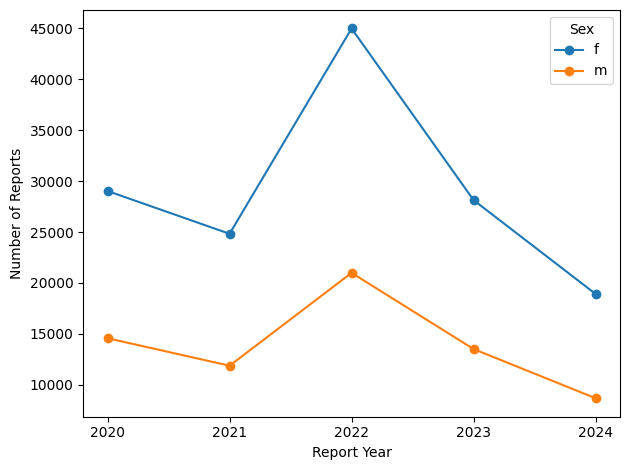

In [ ]:
# Group and pivot
sex_yrs = data[['primaryid', 'rept_yr', 'sex']].drop_duplicates()
sex = sex_yrs.groupby(['rept_yr', 'sex']).size().reset_index(name='count')
pivot_sex = sex.pivot(index='rept_yr', columns='sex', values='count').fillna(0)

# Plot
plt.figure(figsize=(12, 6))
ax = pivot_sex.plot(kind='line', marker='o')

# Set integer x-axis ticks
ax.set_xticks(pivot_sex.index)
ax.set_xticklabels(pivot_sex.index.astype(int))

plt.xlabel('Report Year')
plt.ylabel('Number of Reports')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

In [10]:
# Ratio of reports by sex
male = sex_yrs[sex_yrs['sex'] == 'm']
male_pct = (len(male) / len(sex_yrs)) * 100

female = sex_yrs[sex_yrs['sex'] == 'f']
female_pct = (len(female) / len(sex_yrs)) * 100

print(f'Ratio of reports for male patients: {male_pct:.2f}%')
print(f'Ratio of reports for female patients: {female_pct:.2f}%')

Ratio of reports for male patients: 32.31%
Ratio of reports for female patients: 67.69%


### 4. Indication

<Figure size 1200x600 with 0 Axes>

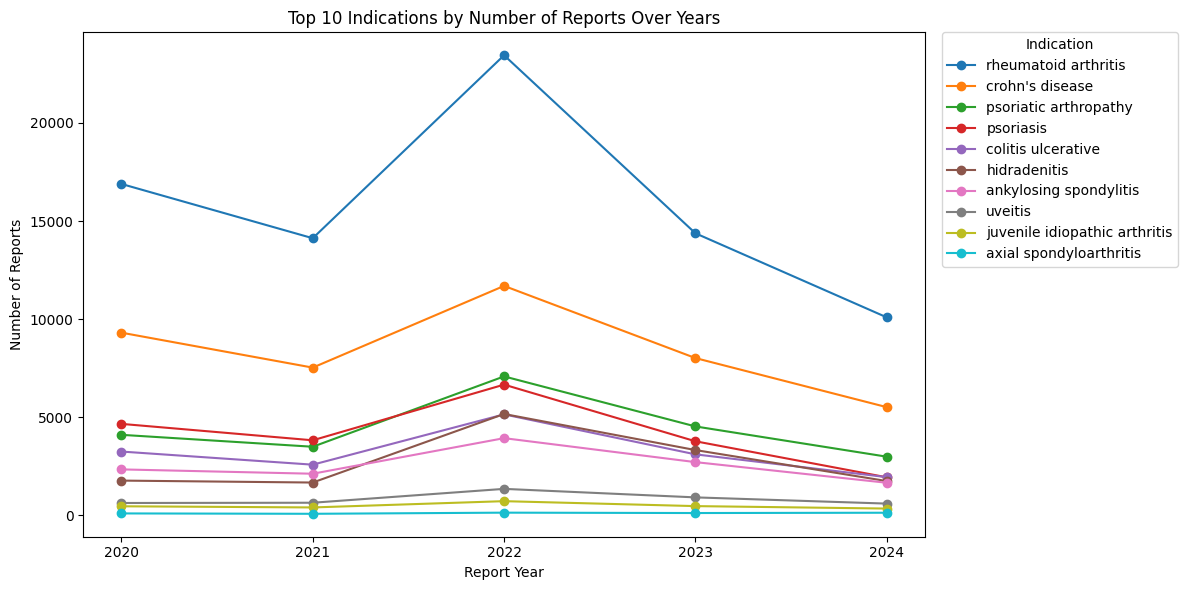

In [11]:
# Group and pivot
indi_yrs = data[['primaryid', 'rept_yr', 'indi_pt']].drop_duplicates()
indi = indi_yrs.groupby(['rept_yr', 'indi_pt']).size().reset_index(name='count')
pivot_indi = indi.pivot(index='rept_yr', columns='indi_pt', values='count').fillna(0)

# Get top 10 indications 
top_10_indi = pivot_indi.sum().sort_values(ascending=False).head(10).index
pivot_top10_indi = pivot_indi[top_10_indi]

# Plot
plt.figure(figsize=(12, 6))
ax = pivot_top10_indi.plot(kind='line', marker='o', figsize=(12, 6))

# Set integer x-axis ticks
ax.set_xticks(pivot_top10_indi.index)
ax.set_xticklabels(pivot_top10_indi.index.astype(int))

plt.title('Top 10 Indications by Number of Reports Over Years')
plt.xlabel('Report Year')
plt.ylabel('Number of Reports')

# Move legend to the right
plt.legend(title='Indication', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.tight_layout()
plt.show()

In [13]:
indi_yrs['indi_pt'].value_counts().head(10)

indi_pt
rheumatoid arthritis             78935
crohn's disease                  42050
psoriatic arthropathy            22179
psoriasis                        20839
colitis ulcerative               16010
hidradenitis                     13655
ankylosing spondylitis           12741
uveitis                           4103
juvenile idiopathic arthritis     2370
axial spondyloarthritis            530
Name: count, dtype: int64

In [14]:
len(indi_yrs[indi_yrs['indi_pt'] == 'rheumatoid arthritis']) / len(indi_yrs) * 100

35.31735733908422

### 5. Preferred Terms

<Figure size 1200x600 with 0 Axes>

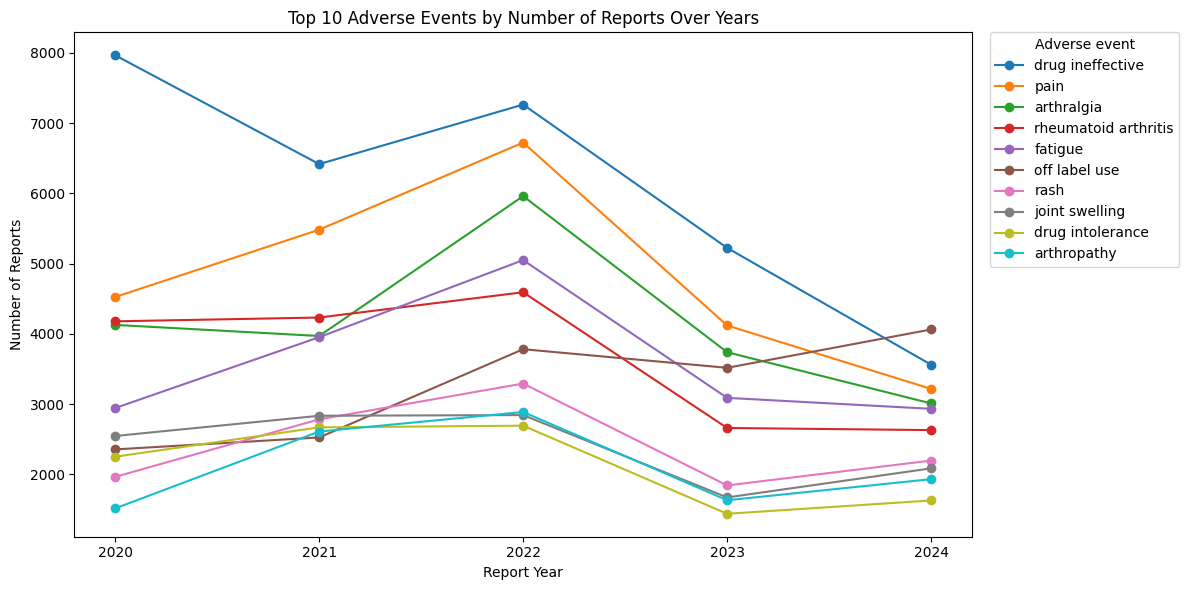

In [12]:
# Group and pivot
pt_yrs = data[['primaryid', 'rept_yr', 'pt']].drop_duplicates()
pt = pt_yrs.groupby(['rept_yr', 'pt']).size().reset_index(name='count')
pivot_indi = pt.pivot(index='rept_yr', columns='pt', values='count').fillna(0)

# Get top 10 indications 
top_10_pt = pivot_indi.sum().sort_values(ascending=False).head(10).index
pivot_top10_pt = pivot_indi[top_10_pt]

# Plot
plt.figure(figsize=(12, 6))
ax = pivot_top10_pt.plot(kind='line', marker='o', figsize=(12, 6))

# Set integer x-axis ticks
ax.set_xticks(pivot_top10_pt.index)
ax.set_xticklabels(pivot_top10_pt.index.astype(int))

plt.title('Top 10 Adverse Events by Number of Reports Over Years')
plt.xlabel('Report Year')
plt.ylabel('Number of Reports')

# Move legend to the right
plt.legend(title='Adverse event', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.tight_layout()
plt.show()